In [1]:
# save only matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal as sg
import os

file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir_mat = '../DATA/STFT_images/'
# output_dir_mat = 'D:/Codes/tactileGestureDetection/DATA/STFT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir_mat):
    for filename in os.listdir(output_dir_mat):
        file_path = os.path.join(output_dir_mat, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir_mat)

os.makedirs(output_dir_mat)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# 提取采样率
# time_data = data['time'].values
# fs = 1 / np.mean(np.diff(time_data))  # 计算采样率
fs = 200
## 应该设置成与采样时一致的200Hz

# 创建一个用于存储所有stftmatrix及相关信息的列表
matrix_records = []
label_records = []
id_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    window_touch_type = window_data['window_touch_type'].iloc[0]
    print(window_data.shape)

    # 创建一个数据存储空间
    data_matrix = []
    

    for col in columns_of_interest:

        signal = window_data[col].values
        
        # 计算STFT
        nperseg = 16
        # print(len(signal))
        noverlap = nperseg - 1
        # f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window=sg.windows.general_gaussian(64, p=1, sig=7))
        f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window='hamming')
        # print(len(abs(Zxx)),"行",len(abs(Zxx)[0]),"列")
        

        # 存储数据
        data_matrix.append(np.abs(Zxx))

    # 将时频谱图数据堆叠成一个三维矩阵
    # 形状为 (frequency, time, num_joints)
    stft_matrix = np.stack(data_matrix, axis=-1)  # 沿新的轴（-1轴）堆叠
    print(stft_matrix.shape)
    matrix_records.append(stft_matrix) 
    label_records.append(window_touch_type)
    id_records.append(window_id)   

# 保存matrix及相关信息为npz文件
matrix_path = os.path.join(output_dir_mat, 'stft_matrices.npz')
np.savez(matrix_path, stft_matrices=matrix_records, labels = label_records, window_ids = id_records)
print("STFT Matrices已成功保存。")

(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 

(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 29, 28)
(28, 77)
(9, 

KeyboardInterrupt: 

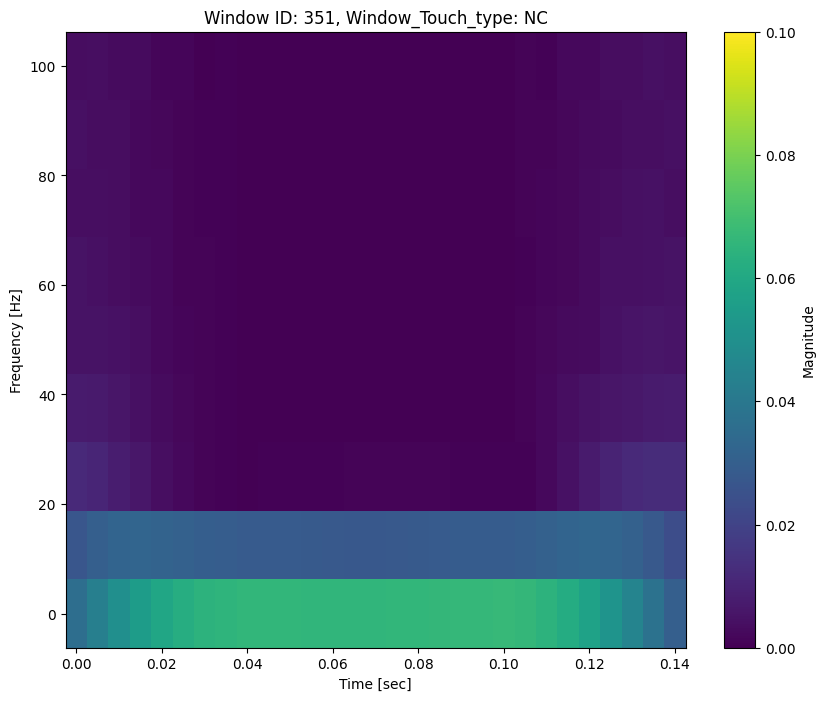

In [1]:
# Save both plot and matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal as sg
import os

file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir_img = '../DATA/STFT_images/'
output_dir_mat = '../DATA/STFT_images/'
# output_dir_img = 'D:/Codes/tactileGestureDetection/DATA/STFT_images/'
# output_dir_mat = 'D:/Codes/tactileGestureDetection/DATA/STFT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir_img):
    for filename in os.listdir(output_dir_img):
        file_path = os.path.join(output_dir_img, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir_img)

os.makedirs(output_dir_img)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# 提取采样率
# time_data = data['time'].values
# fs = 1 / np.mean(np.diff(time_data))  # 计算采样率
fs = 200
## 应该设置成与采样时一致的200Hz

# 创建一个列表，用于记录图像文件名和对应的window_id和touch_type
image_records = []
# 创建一个用于存储所有stftmatrix及相关信息的列表
matrix_records = []
label_records = []
id_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    window_touch_type = window_data['window_touch_type'].iloc[0]
    print(window_data.shape)
    
    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f'Window ID: {window_id}, Window_Touch_type: {window_touch_type}')

    # 创建一个数据存储空间
    data_matrix = []
    

    for col in columns_of_interest:

        signal = window_data[col].values
        
        # 计算STFT
        nperseg = 16
        # print(len(signal))
        noverlap = nperseg - 1
        # f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window=sg.windows.general_gaussian(64, p=1, sig=7))
        f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window='hamming')
        # print(len(abs(Zxx)),"行",len(abs(Zxx)[0]),"列")
        
        # 绘制时频谱图
        cax = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1)

        # 存储数据
        data_matrix.append(np.abs(Zxx))
    
    # 添加图例和标签
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.colorbar(cax, ax=ax, label='Magnitude')
    
    # 保存图像
    image_filename = f'window_{window_id}_touch_{window_touch_type}.png'
    image_path = os.path.join(output_dir_img, image_filename)
    plt.savefig(image_path)
    plt.close(fig)
    
    # 记录图像文件名和对应的window_id和touch_type
    image_records.append({'image_filename': image_filename, 'window_id': window_id, 'window_touch_type': window_touch_type})

    # 将时频谱图数据堆叠成一个三维矩阵
    # 形状为 (frequency, time, num_joints)
    stft_matrix = np.stack(data_matrix, axis=-1)  # 沿新的轴（-1轴）堆叠
    print(stft_matrix.shape)
    matrix_records.append(stft_matrix) 
    label_records.append(window_touch_type)
    id_records.append(window_id)   

# 保存记录为CSV文件
records_df = pd.DataFrame(image_records)
records_df.to_csv(os.path.join(output_dir_img, 'image_records.csv'), index=False)
print("STFT图像和记录已成功保存。")

# 保存matrix及相关信息为npz文件
matrix_path = os.path.join(output_dir_mat, 'stft_matrices.npz')
np.savez(matrix_path, stft_matrices=matrix_records, labels = label_records, window_ids = id_records)
print("STFT Matrices已成功保存。")

In [8]:
# Time Domain Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal as sg
import os

file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir_mat = '../DATA/T_images/'
# output_dir_mat = 'D:/Codes/tactileGestureDetection/DATA/STFT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir_mat):
    for filename in os.listdir(output_dir_mat):
        file_path = os.path.join(output_dir_mat, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir_mat)

os.makedirs(output_dir_mat)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# 创建一个用于存储所有stftmatrix及相关信息的列表
matrix_records = []
label_records = []
id_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    window_touch_type = window_data['window_touch_type'].iloc[0]
    print(window_data.shape)

    # 创建一个数据存储空间
    data_matrix = []
    

    for col in columns_of_interest:

        signal = window_data[col].values
        
        # Deploy Time Window Sliding
        T_window_size = 16
        T_step = 1
        T_window_num = len(signal) - T_window_size + 1
        T_matrix = np.zeros([T_window_size, T_window_num])
        for i in range(T_window_num):
            T_matrix[:,i] = signal[i:i+T_window_size]
        # print(T_matrix)
        # 存储数据
        data_matrix.append(T_matrix)

    # 将时频谱图数据堆叠成一个三维矩阵
    # 形状为 (frequency, time, num_joints)
    T_matrix = np.stack(data_matrix, axis=-1)  # 沿新的轴（-1轴）堆叠
    print(T_matrix.shape)
    matrix_records.append(T_matrix) 
    label_records.append(window_touch_type)
    id_records.append(window_id)   

# 保存matrix及相关信息为npz文件
matrix_path = os.path.join(output_dir_mat, 'T_matrices.npz')
np.savez(matrix_path, T_matrices=matrix_records, labels = label_records, window_ids = id_records)
print("T Matrices已成功保存。")

PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: '../DATA/T_images/T_matrices.npz'

In [3]:
# CWT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import os

file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir_mat = '../DATA/CWT_images/'
# output_dir_mat = 'D:/Codes/tactileGestureDetection/DATA/CWT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir_mat):
    for filename in os.listdir(output_dir_mat):
        file_path = os.path.join(output_dir_mat, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir_mat)

os.makedirs(output_dir_mat)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# Define wavelet parameters
wavelet = 'cmor'  # Complex Morlet wavelet (suitable for time-frequency analysis)
scales = np.arange(1, 128)  # Adjust the range of scales as needed
fs = 200


# 创建一个用于存储所有cwt matrix及相关信息的列表
cwt_records = []
label_records = []
id_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    window_touch_type = window_data['window_touch_type'].iloc[0]
    print(window_data.shape)

    # 创建一个数据存储空间
    data_matrix = []
    timestamps = np.arange(len(window_data))
    
    for col in columns_of_interest:
        signal = window_data[col].values
        coefficients, frequencies = pywt.cwt(signal, scales, wavelet,sampling_period=1/fs)
        data_matrix.append(np.abs(coefficients))
        # print(f"CWT performed on channel {col}, size is {coefficients.shape}")
    
    cwt_matrix = np.stack(data_matrix, axis=-1)  # 沿新的轴（-1轴）堆叠
    print("CWT 3D array shape:", cwt_matrix.shape)  # (channels, scales, time)
    
    cwt_records.append(cwt_matrix) 
    label_records.append(window_touch_type)
    id_records.append(window_id)

    # # Plot the scalogram for each channel
    # for i in range(len(columns_of_interest)):
    #     plt.figure(figsize=(10, 6))
    #     plt.imshow(
    #         np.abs(data_matrix[i]), 
    #         extent=[timestamps[0], timestamps[-1], scales[-1], scales[0]], 
    #         cmap='jet', aspect='auto'
    #     )
    #     plt.colorbar(label='Magnitude')
    #     plt.ylabel('Scale')
    #     plt.xlabel('Time')
    #     plt.title(f"CWT Scalogram - Channel {i}")
    #     plt.show()
# 保存matrix及相关信息为npz文件
matrix_path = os.path.join(output_dir_mat, 'cwt_matrices.npz')
np.savez(matrix_path, cwt_matrices=cwt_records, labels = label_records, window_ids = id_records)
print("CWT Matrices已成功保存。")

(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)


/home/mindlab/miniconda/envs/frankapyenv/lib/python3.9/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D array shape: (127, 28, 28)
(28, 77)
CWT 3D arra

(28, 77)


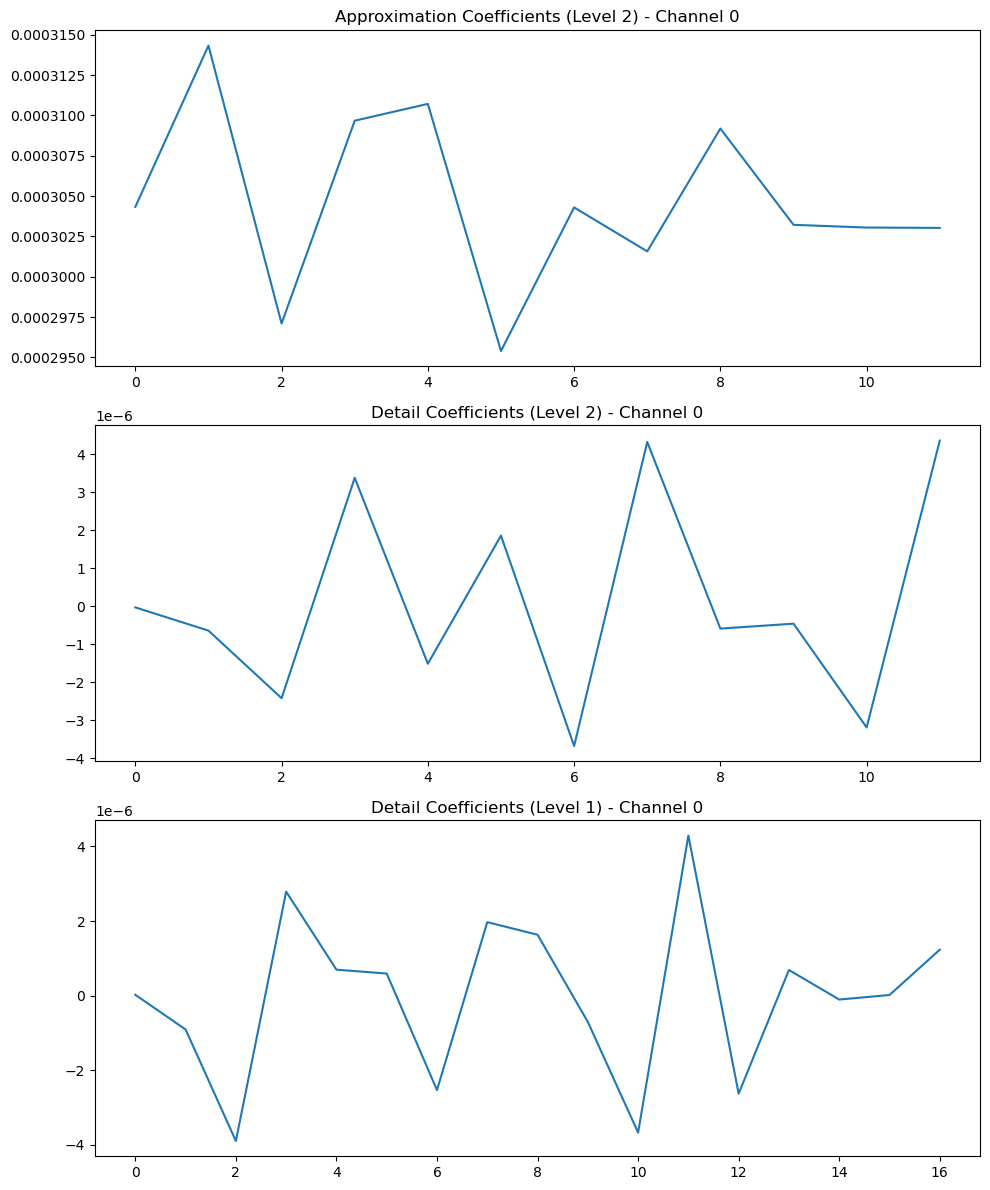

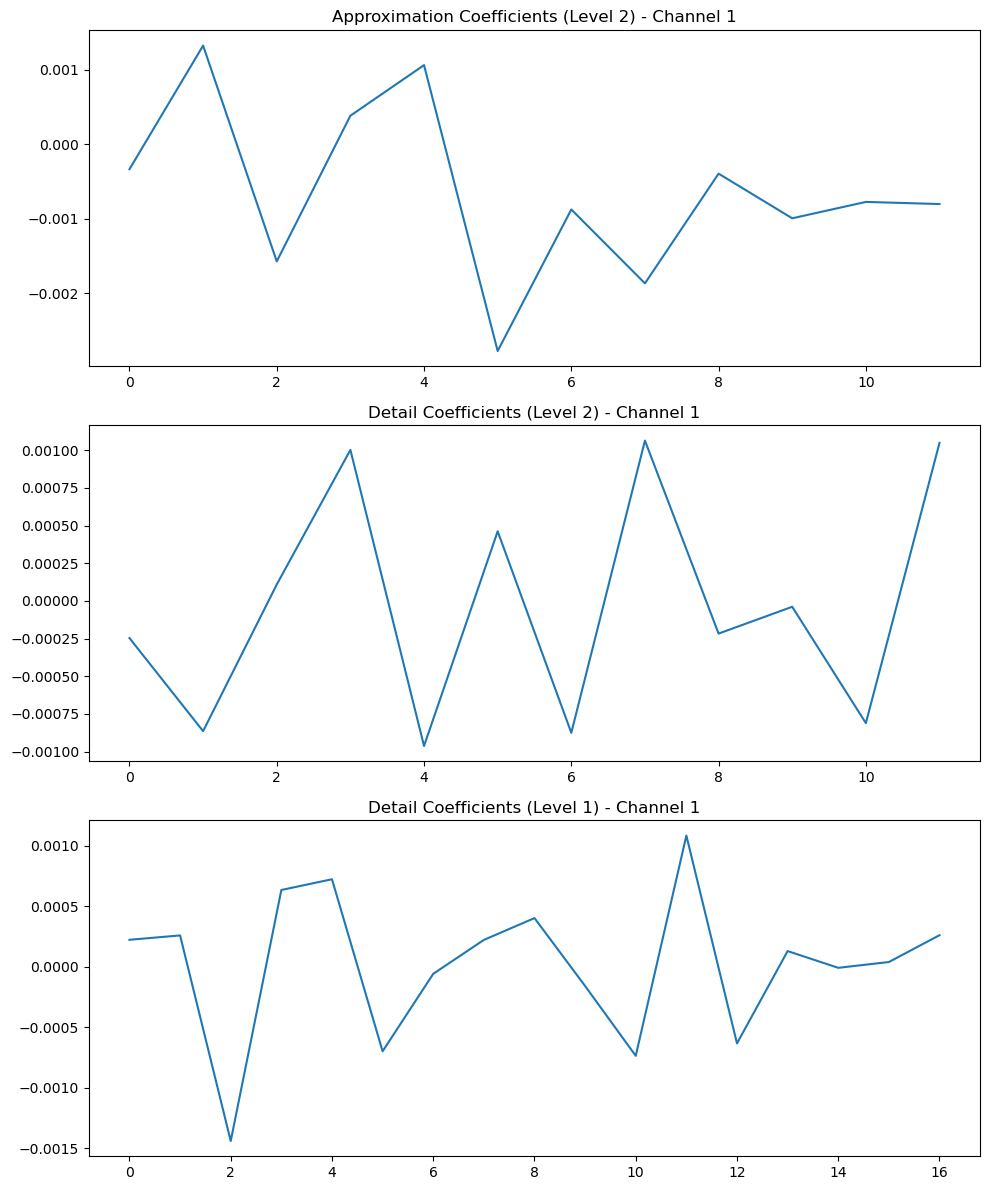

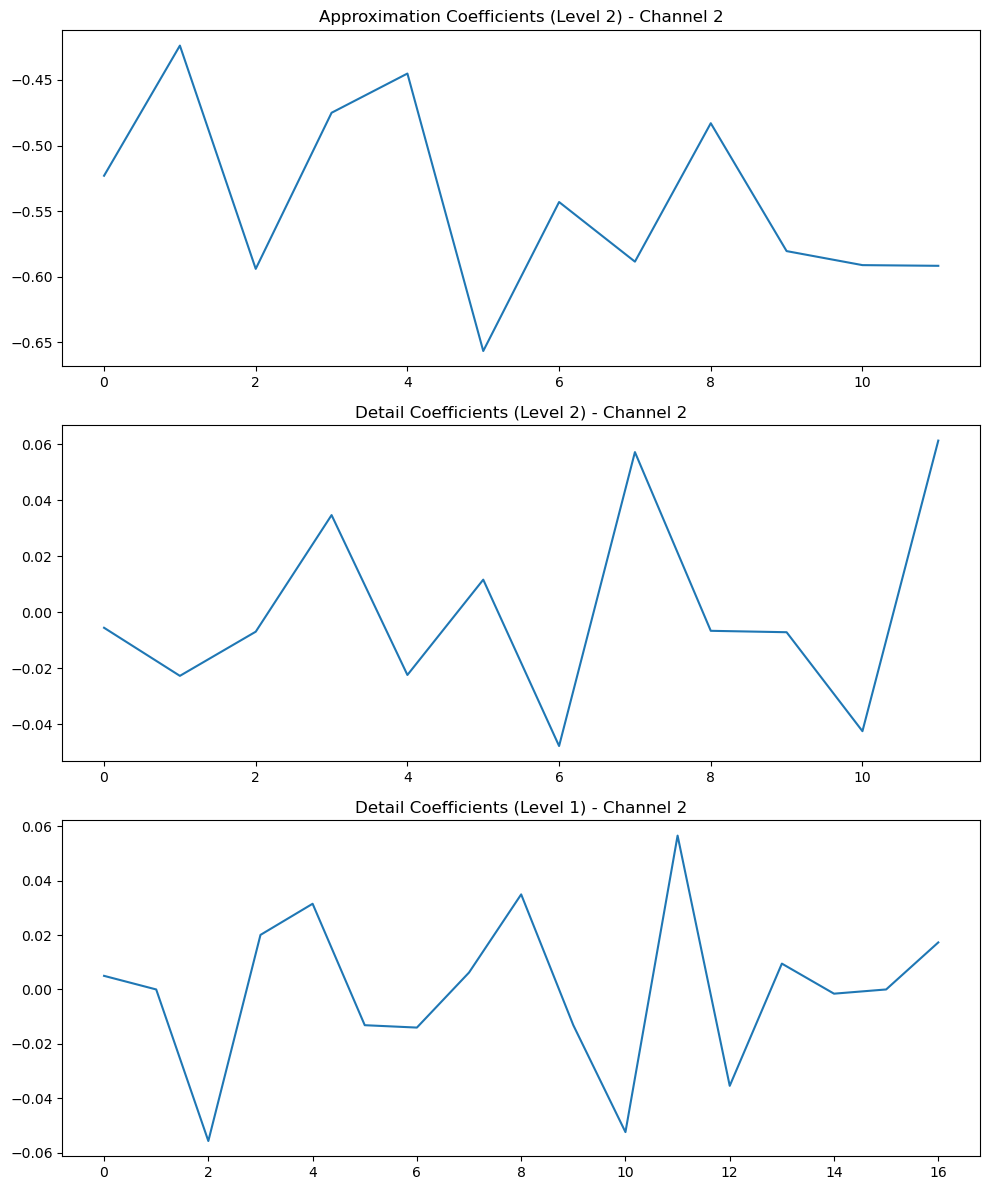

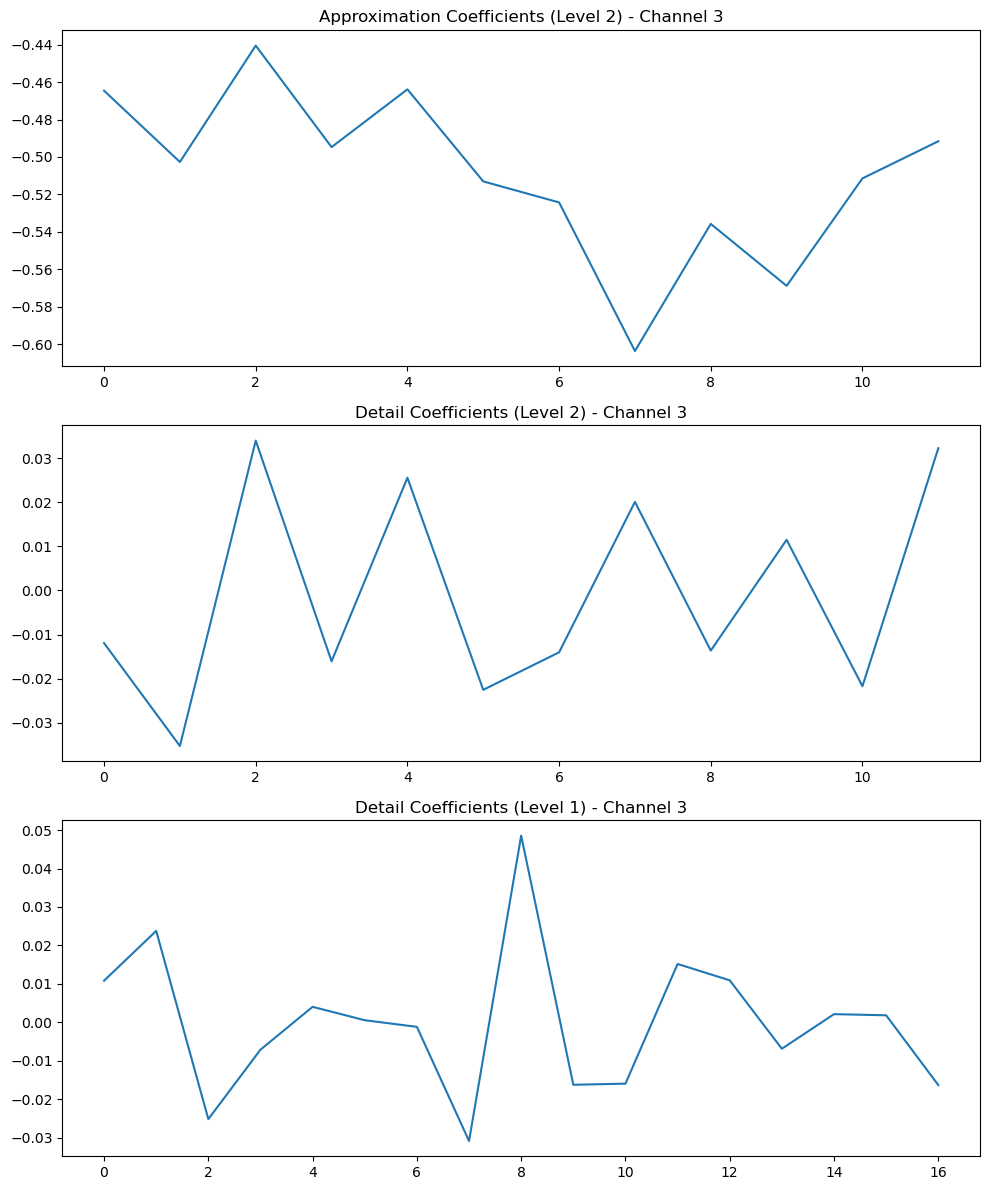

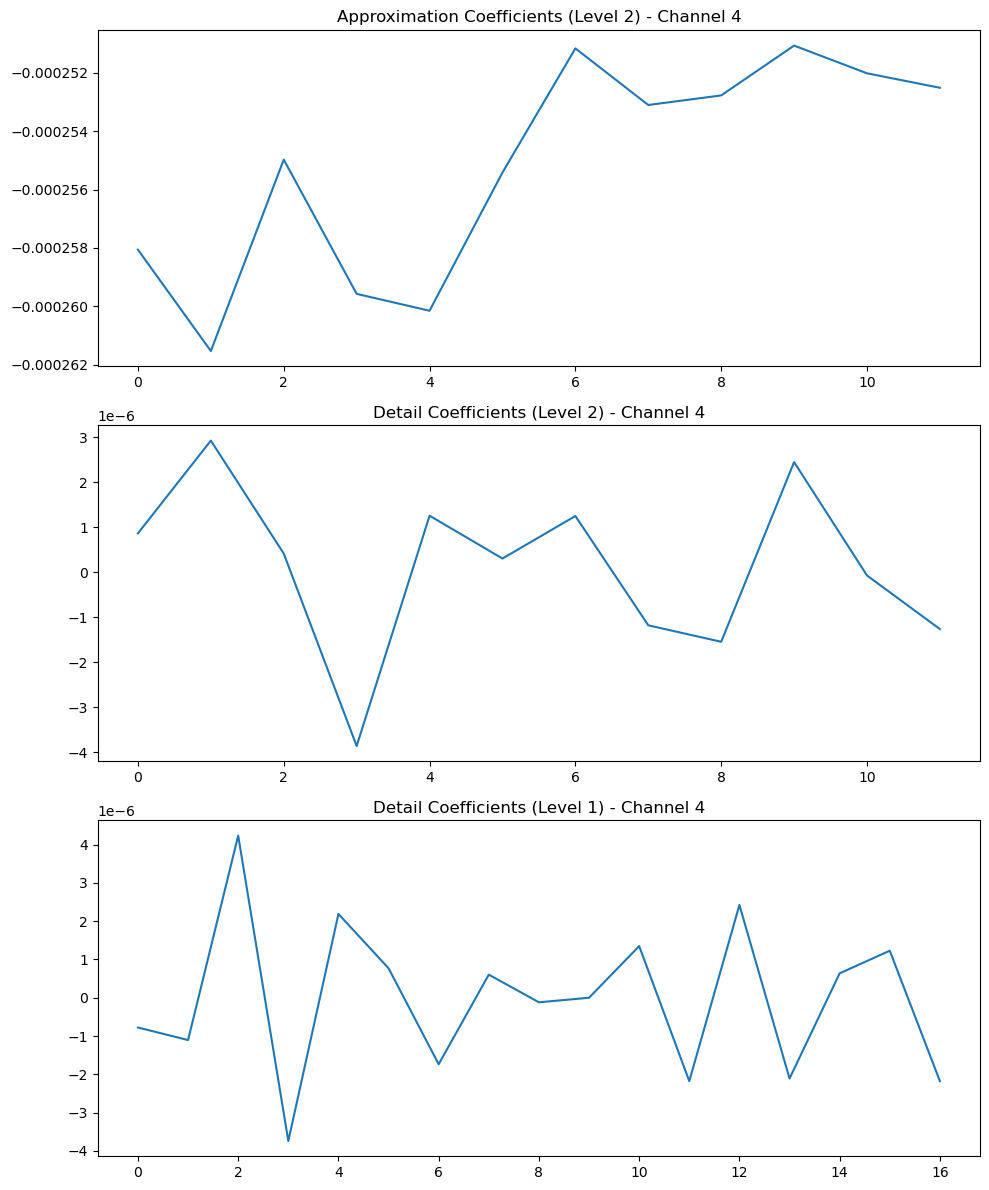

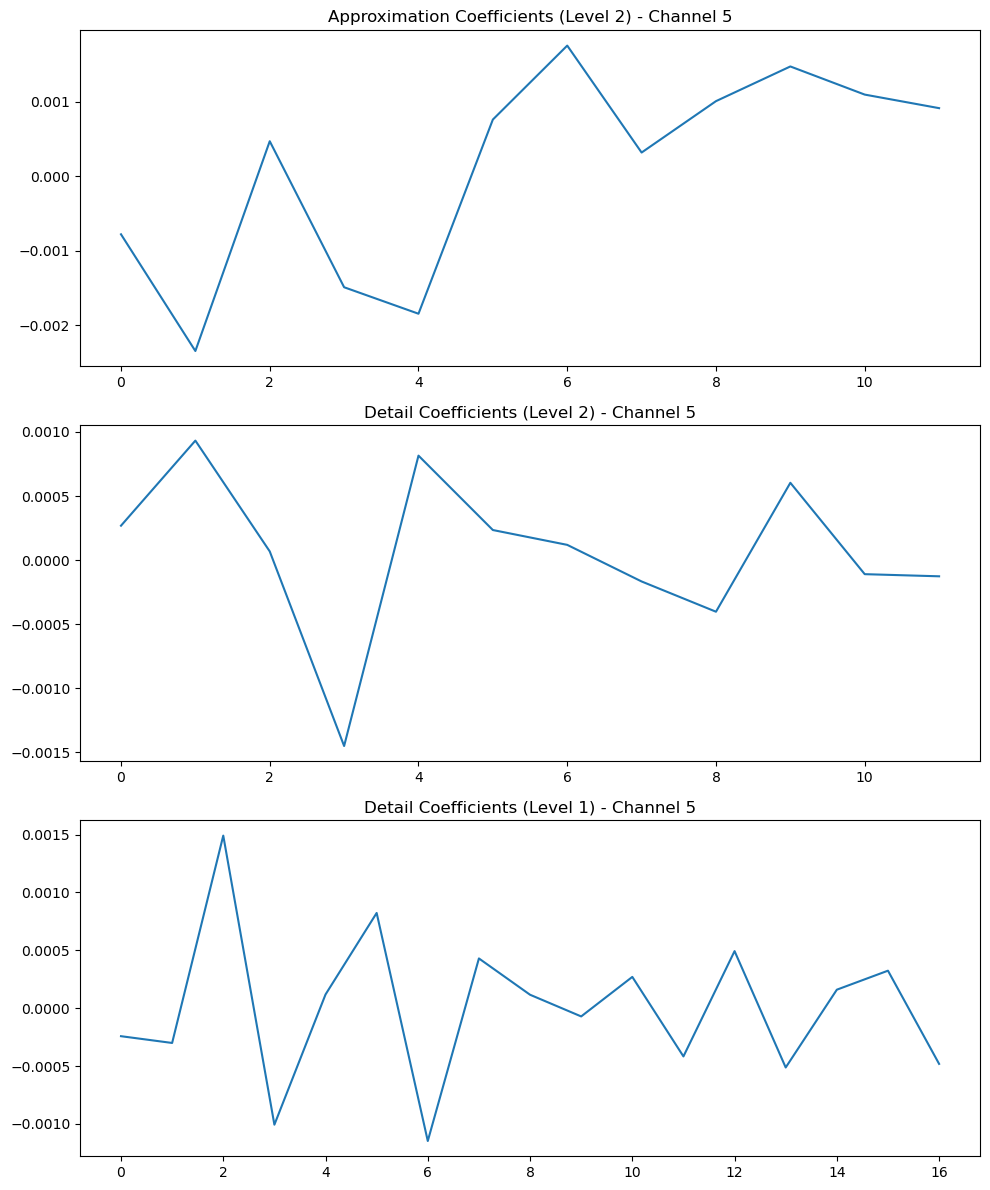

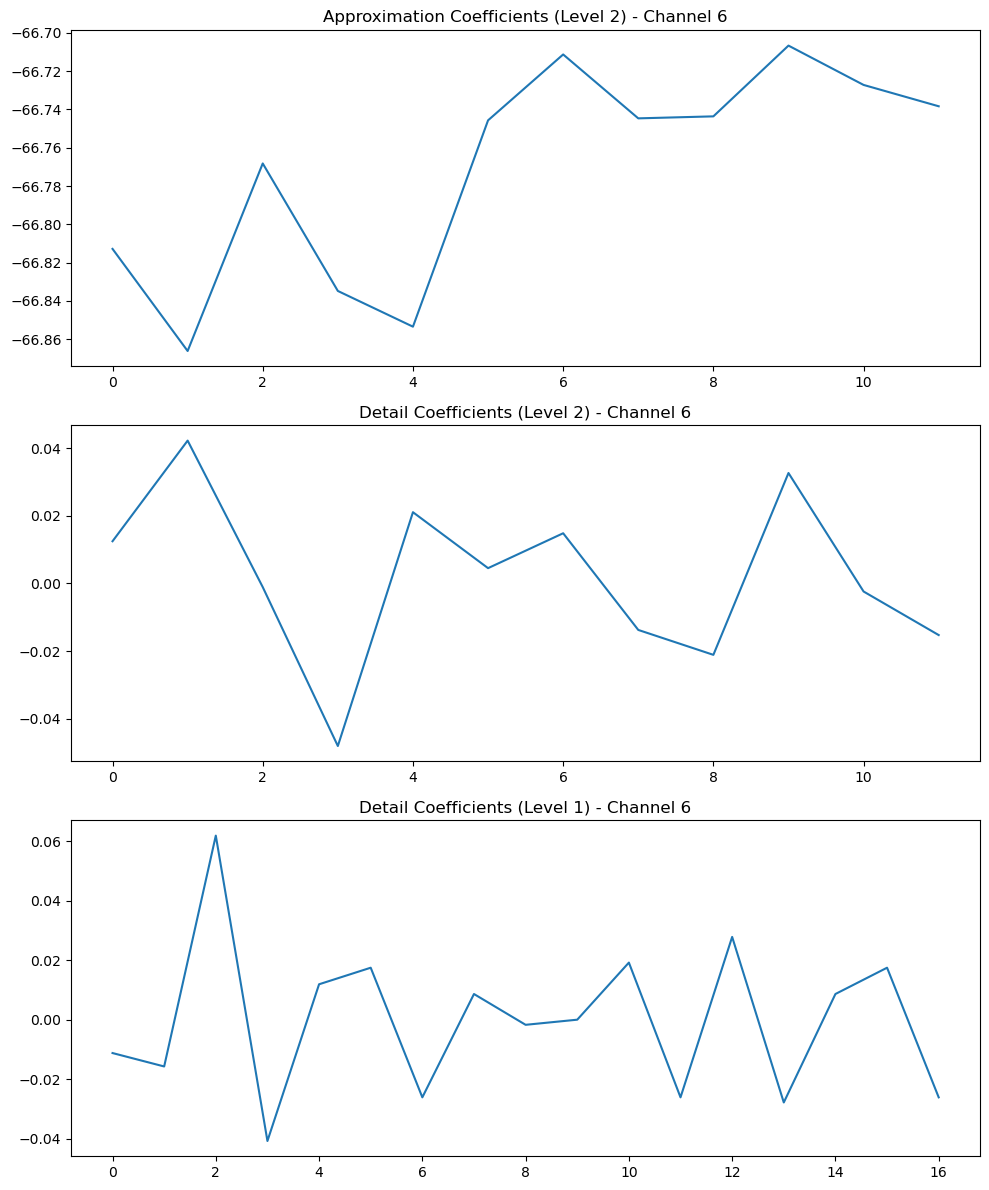

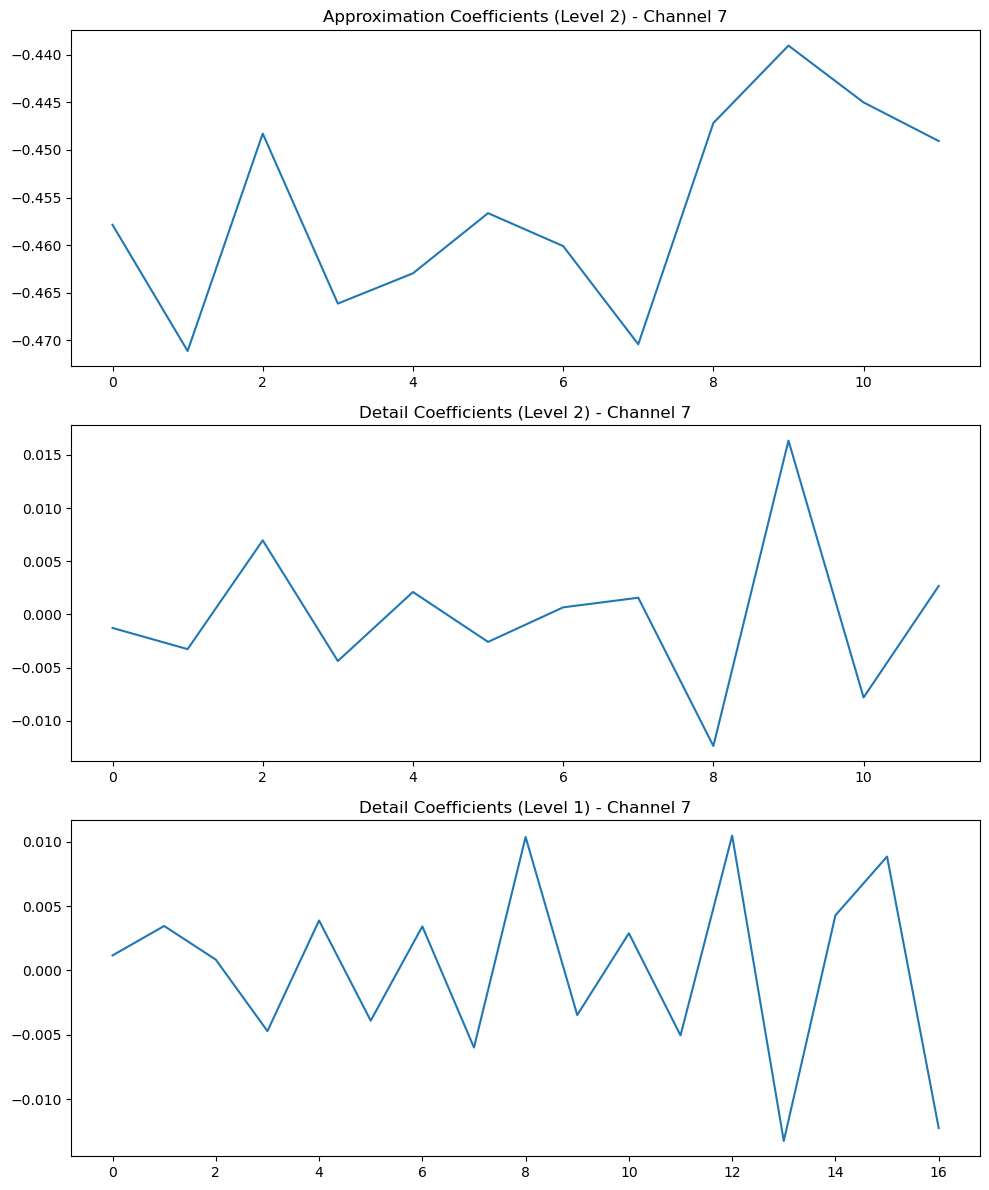

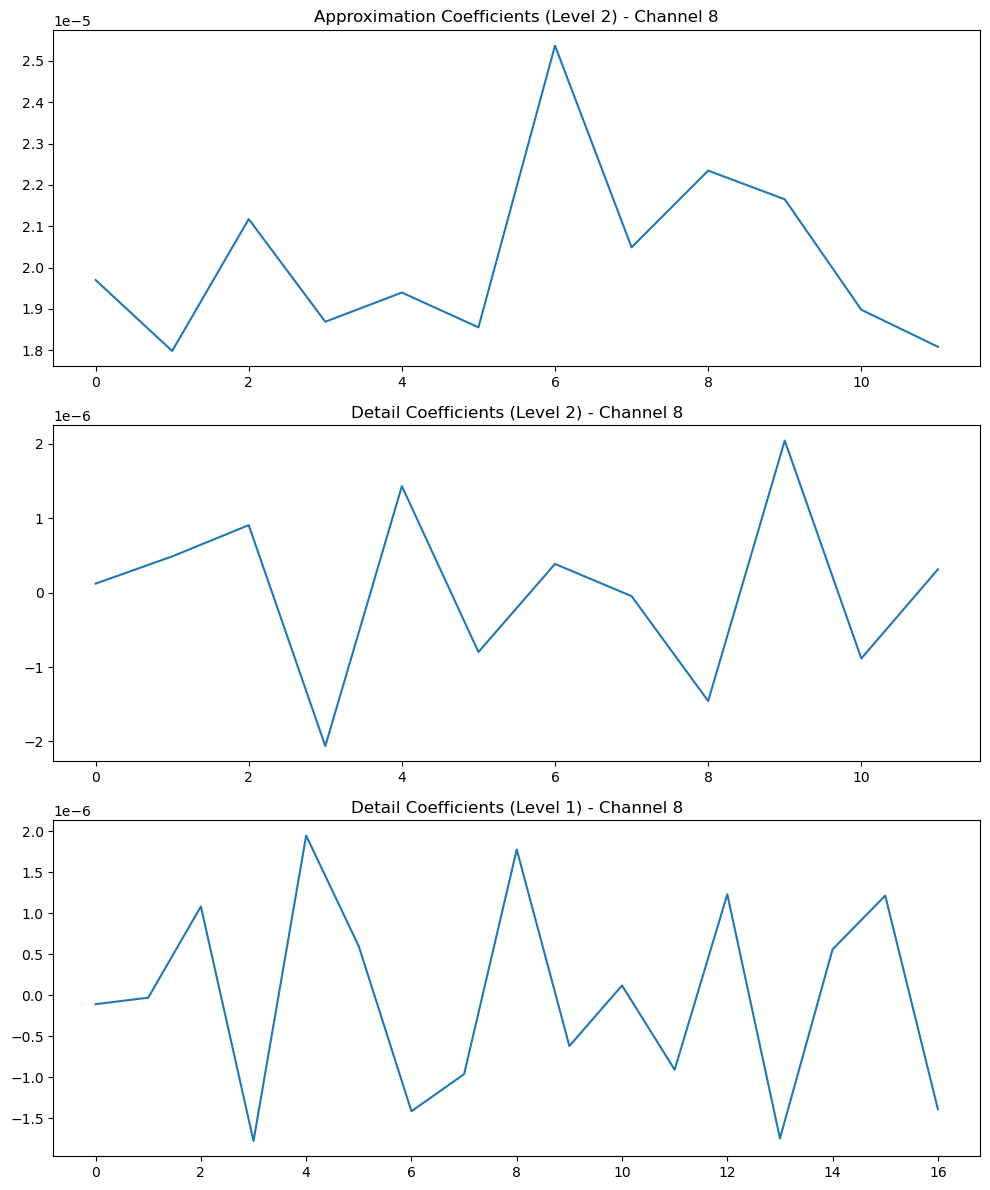

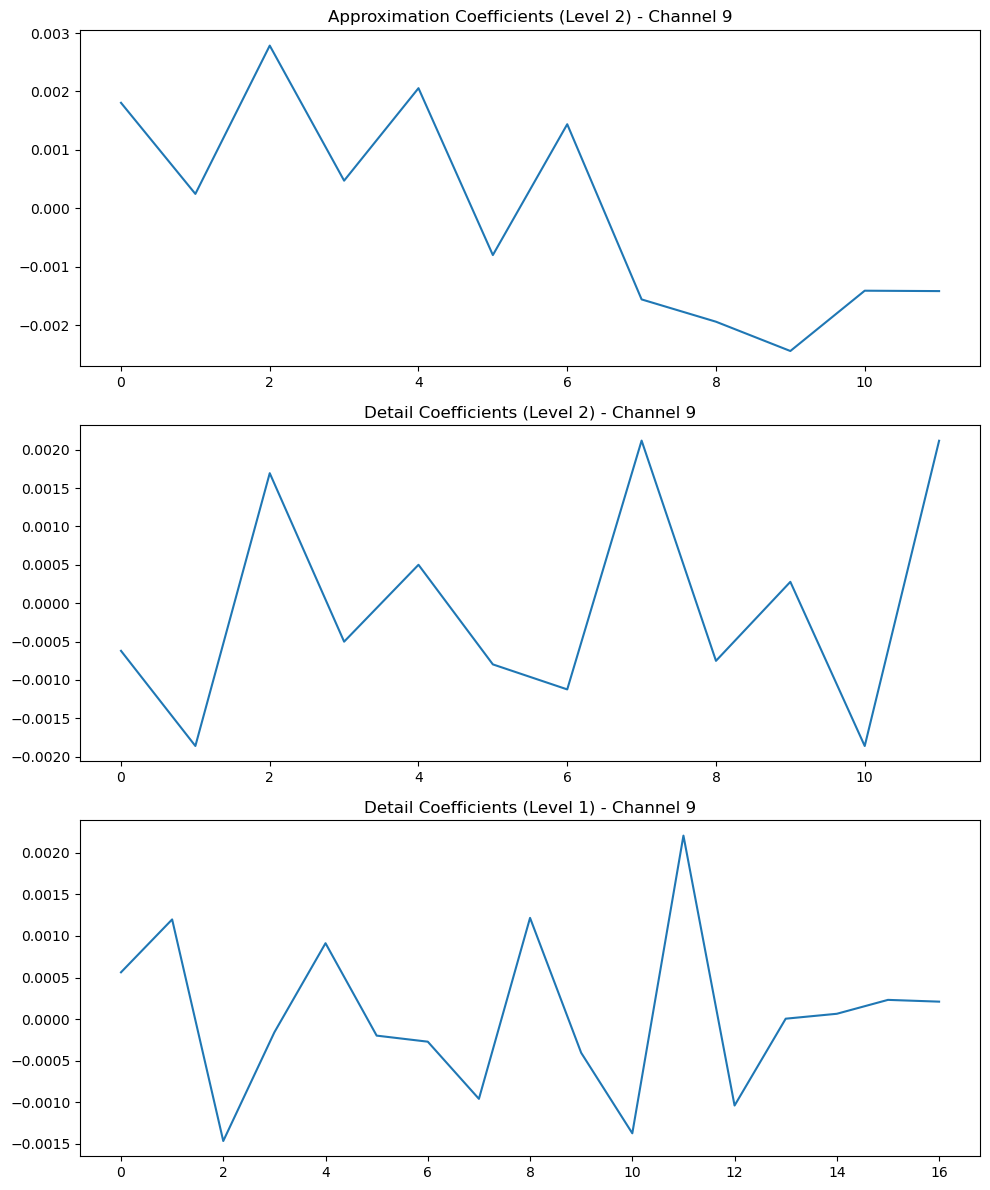

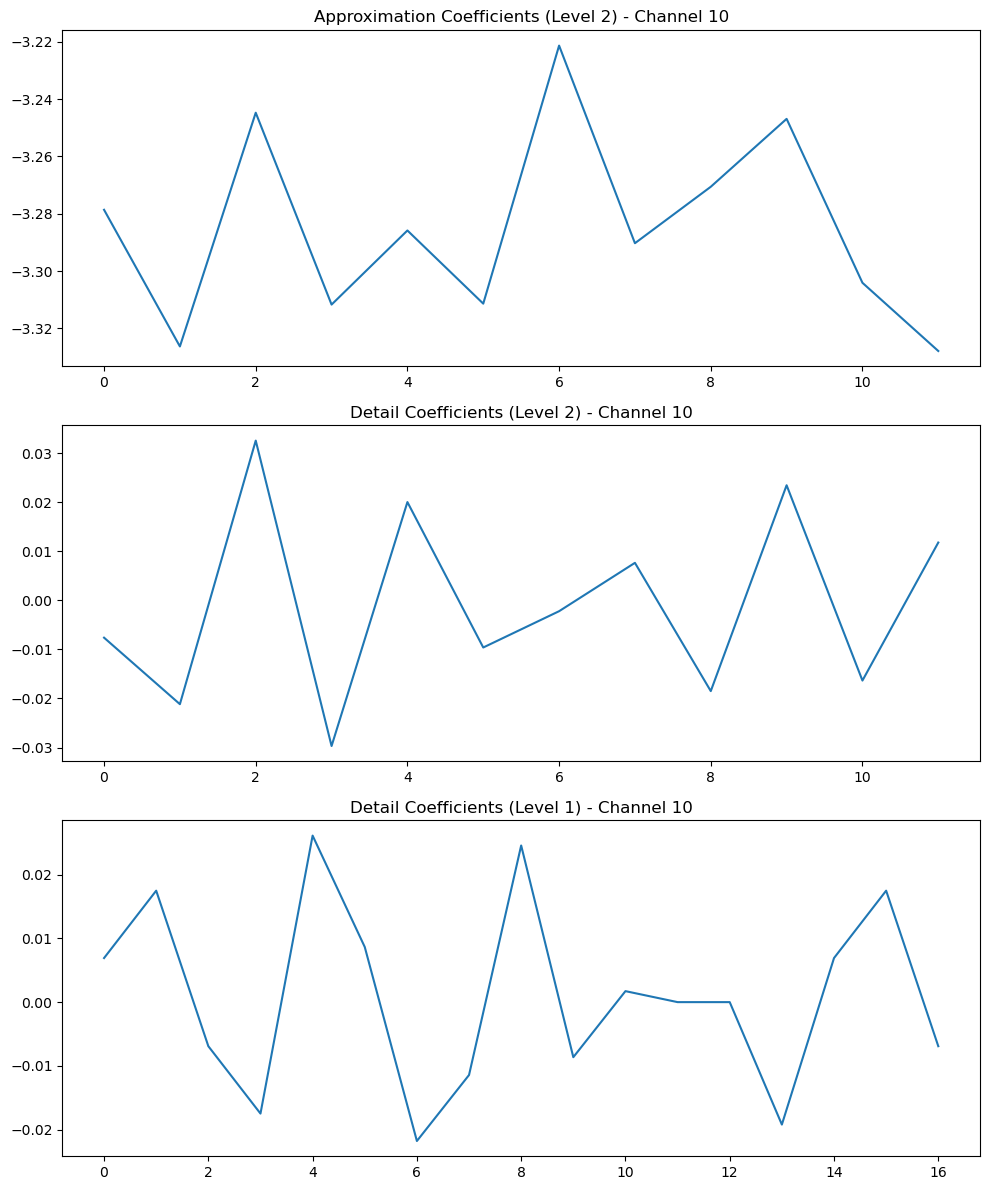

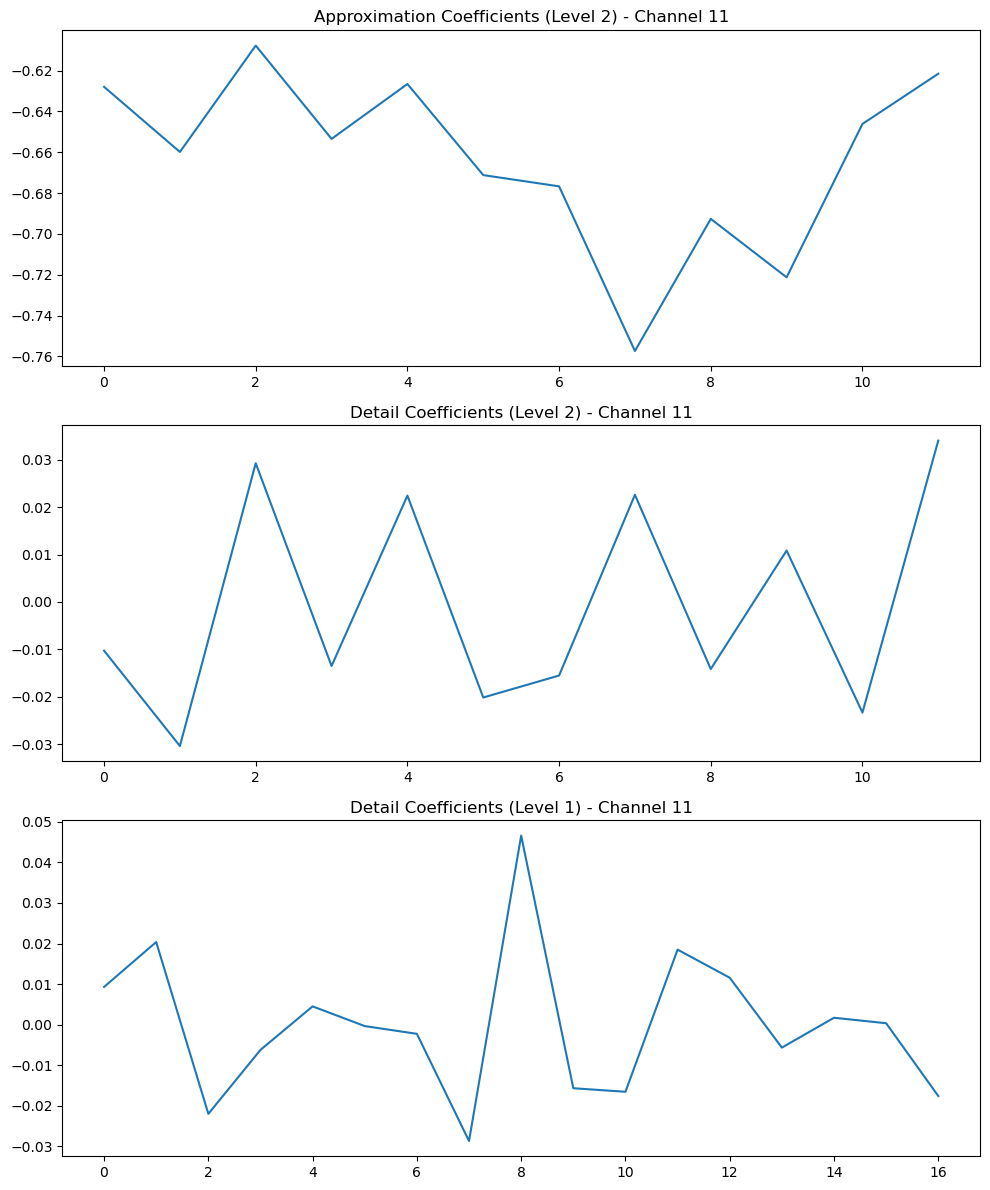

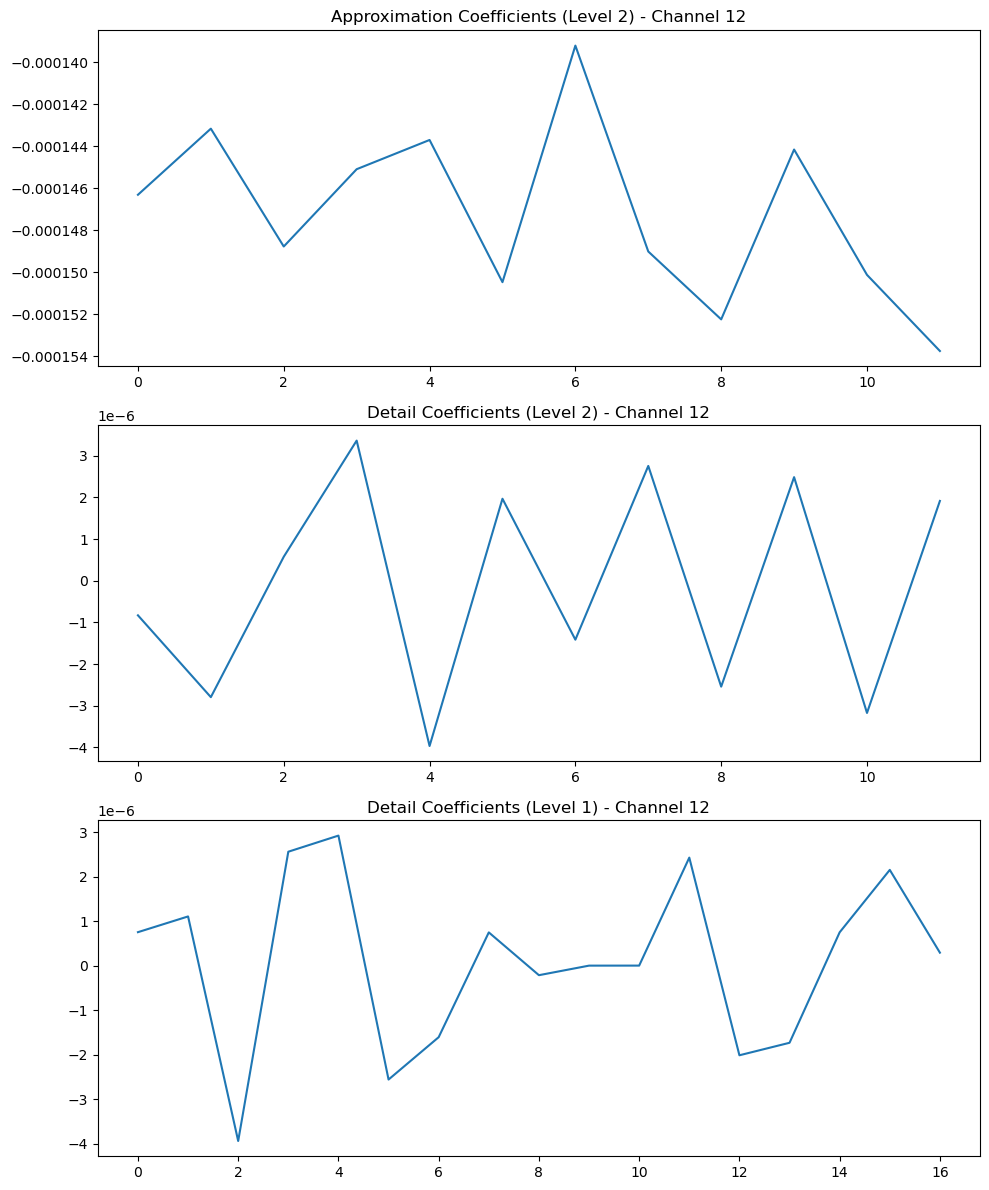

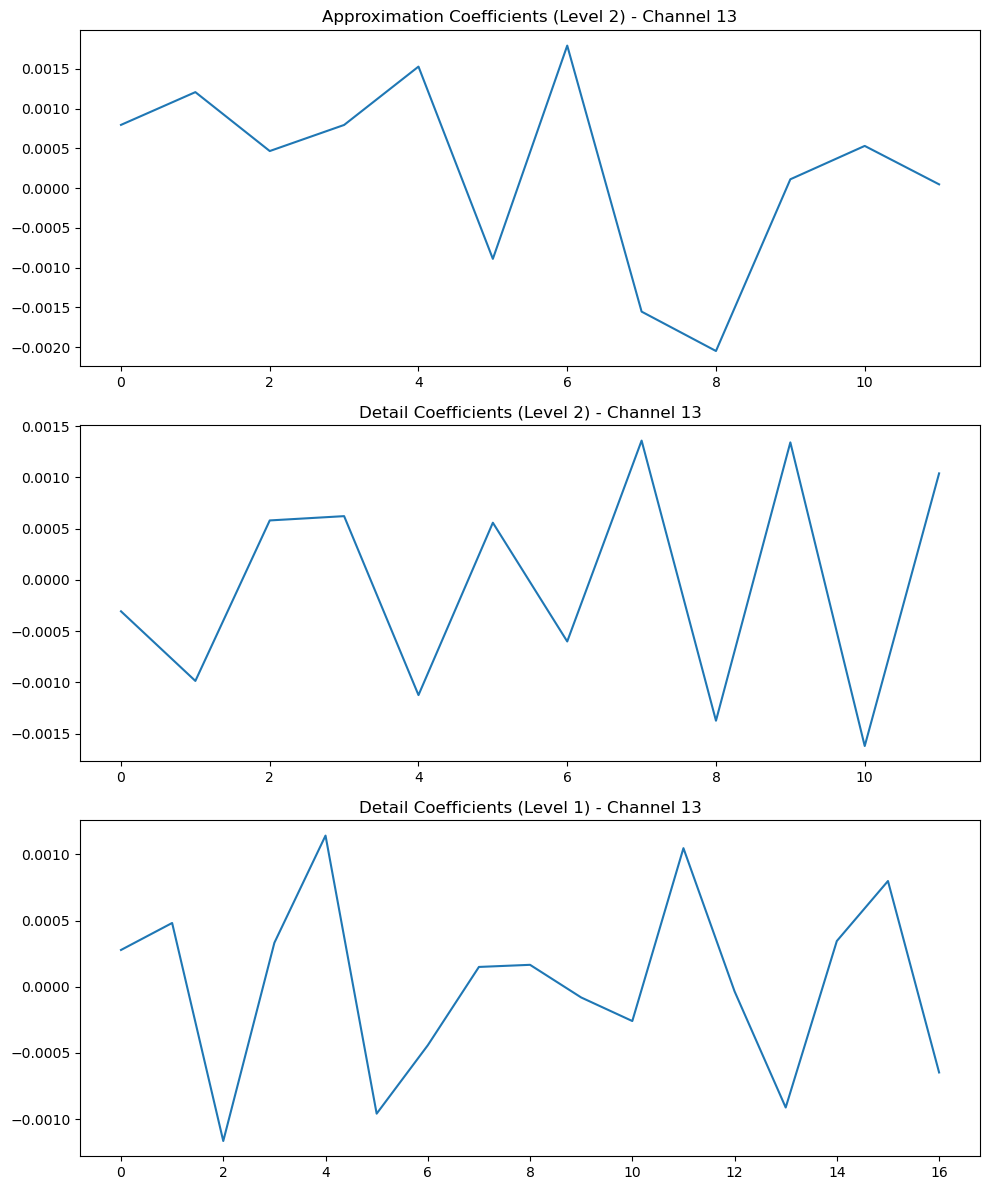

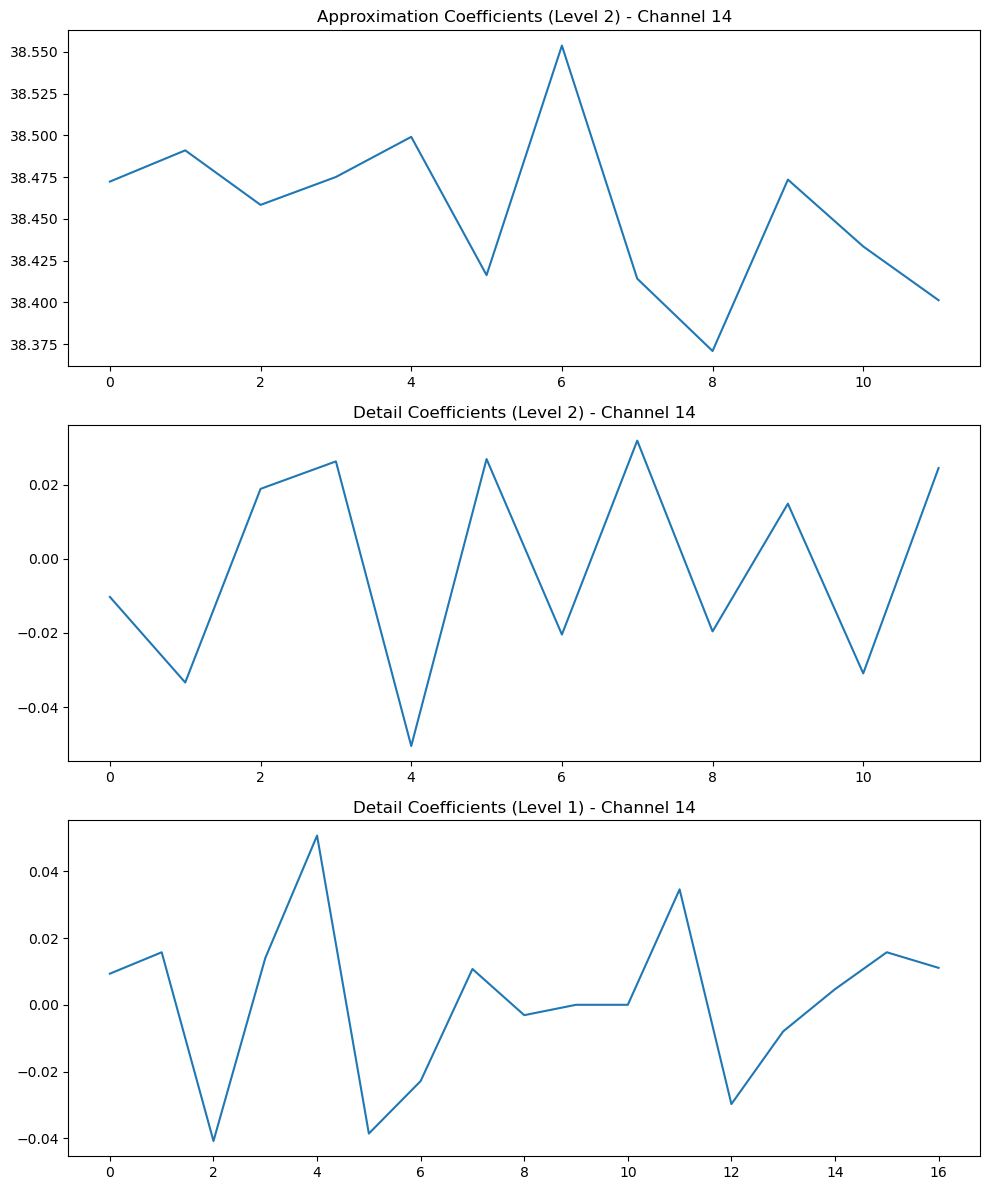

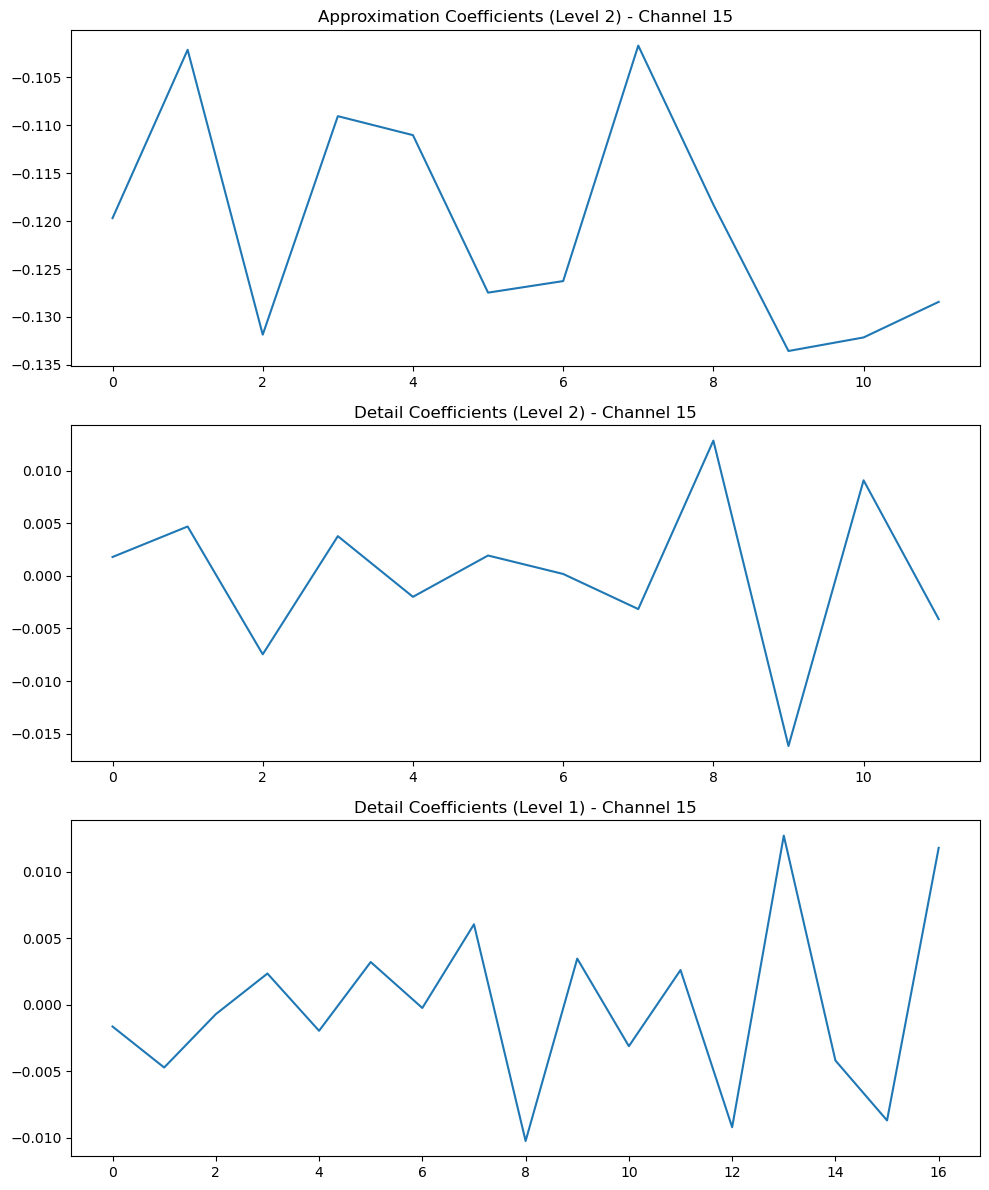

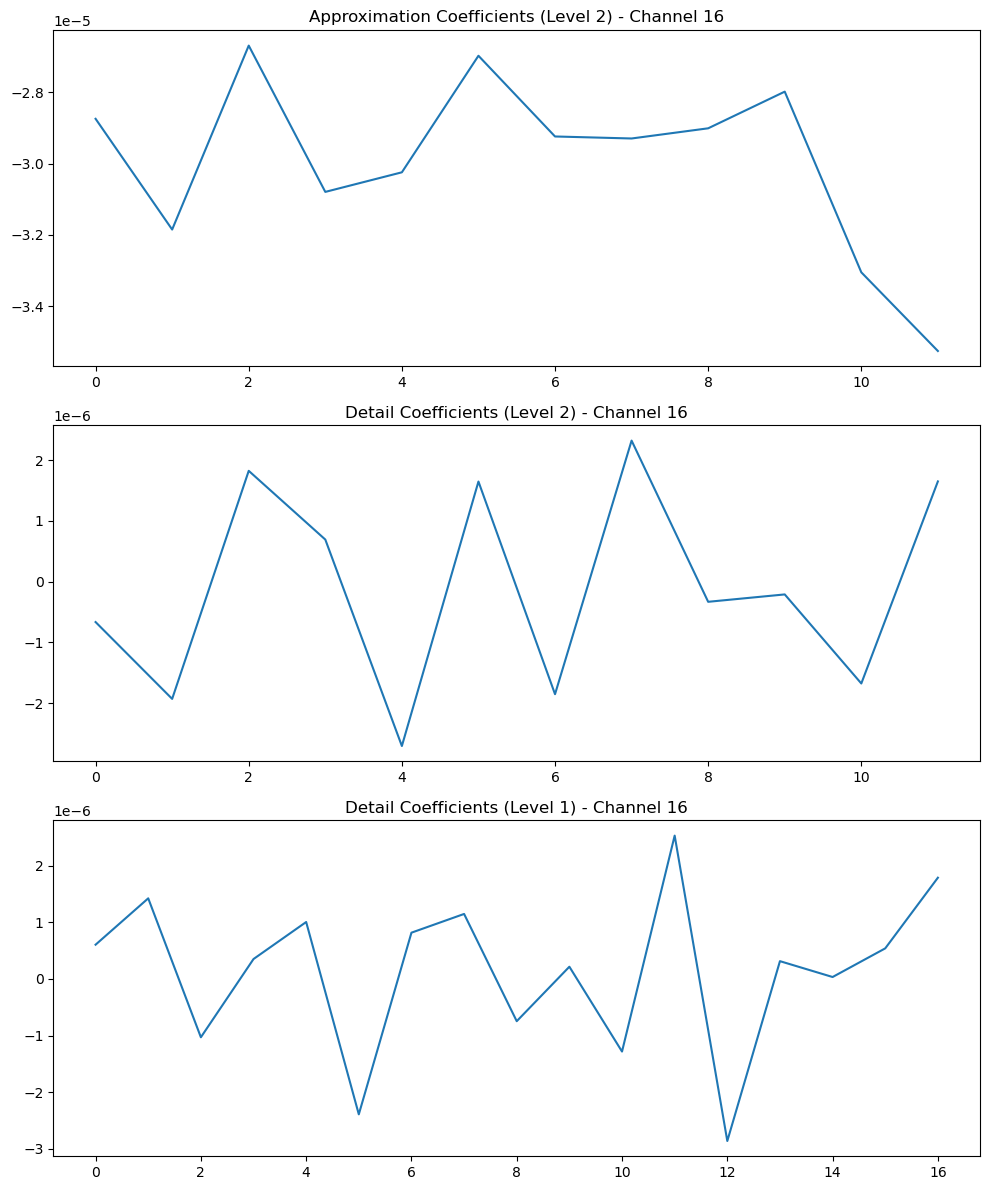

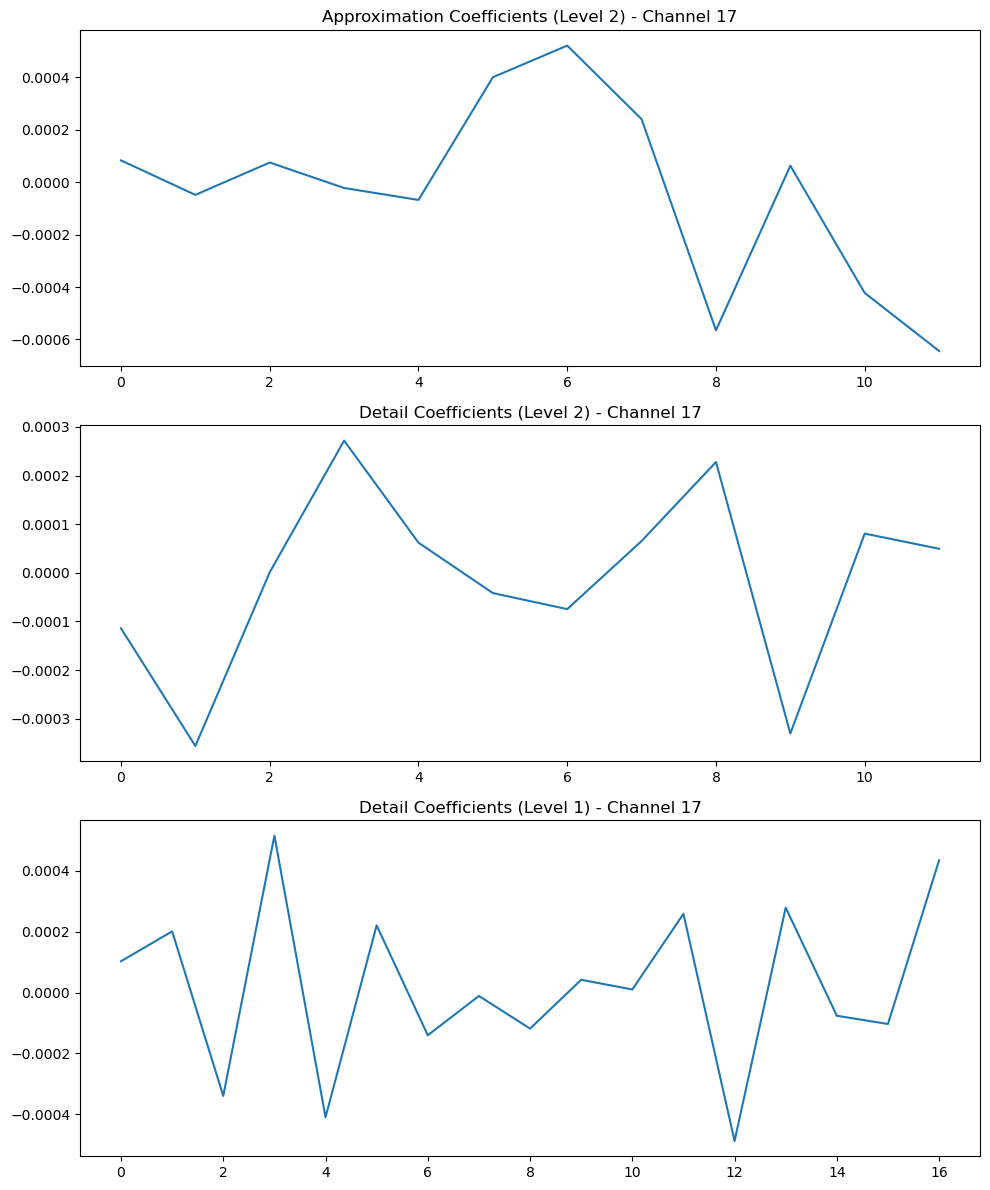

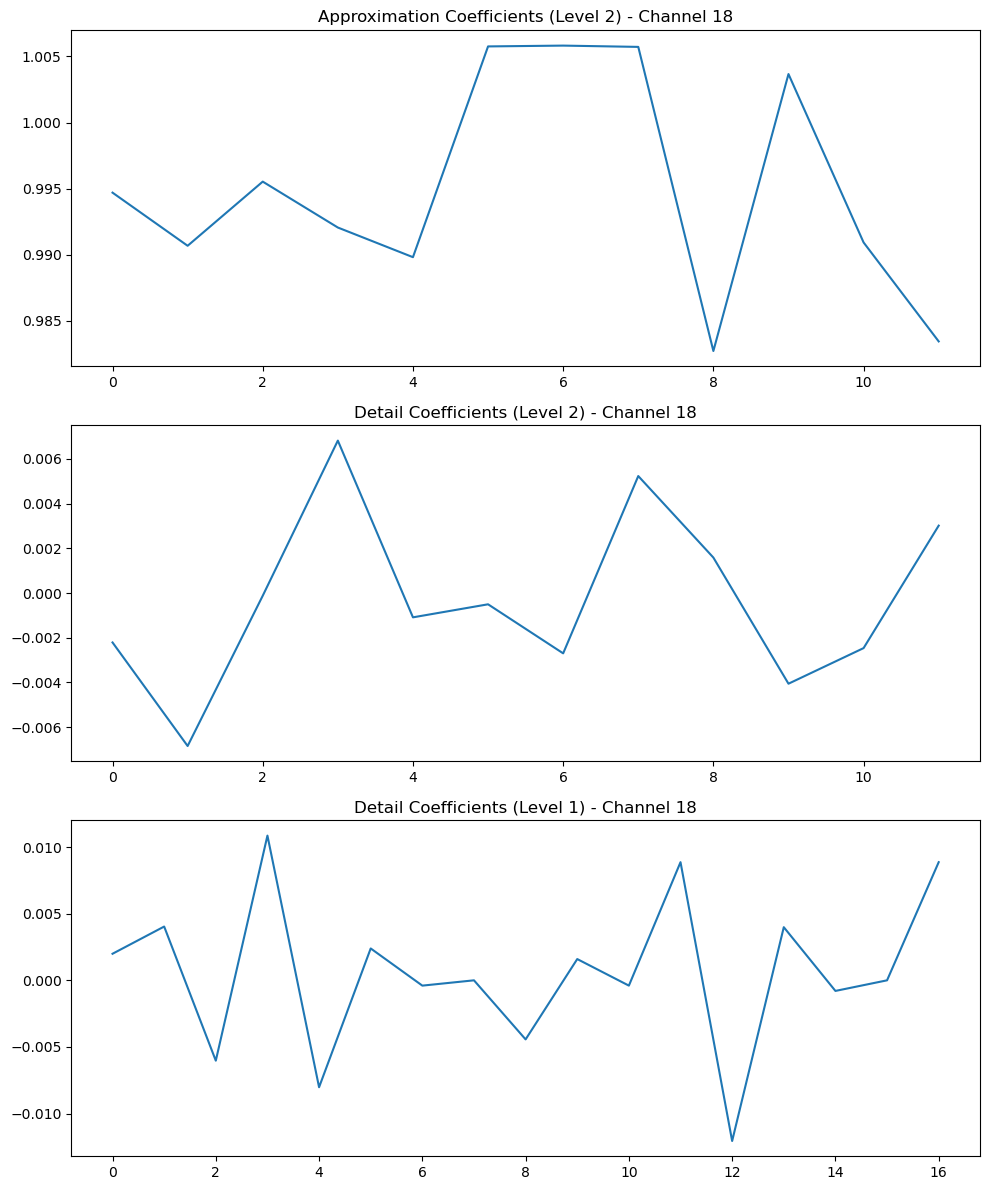

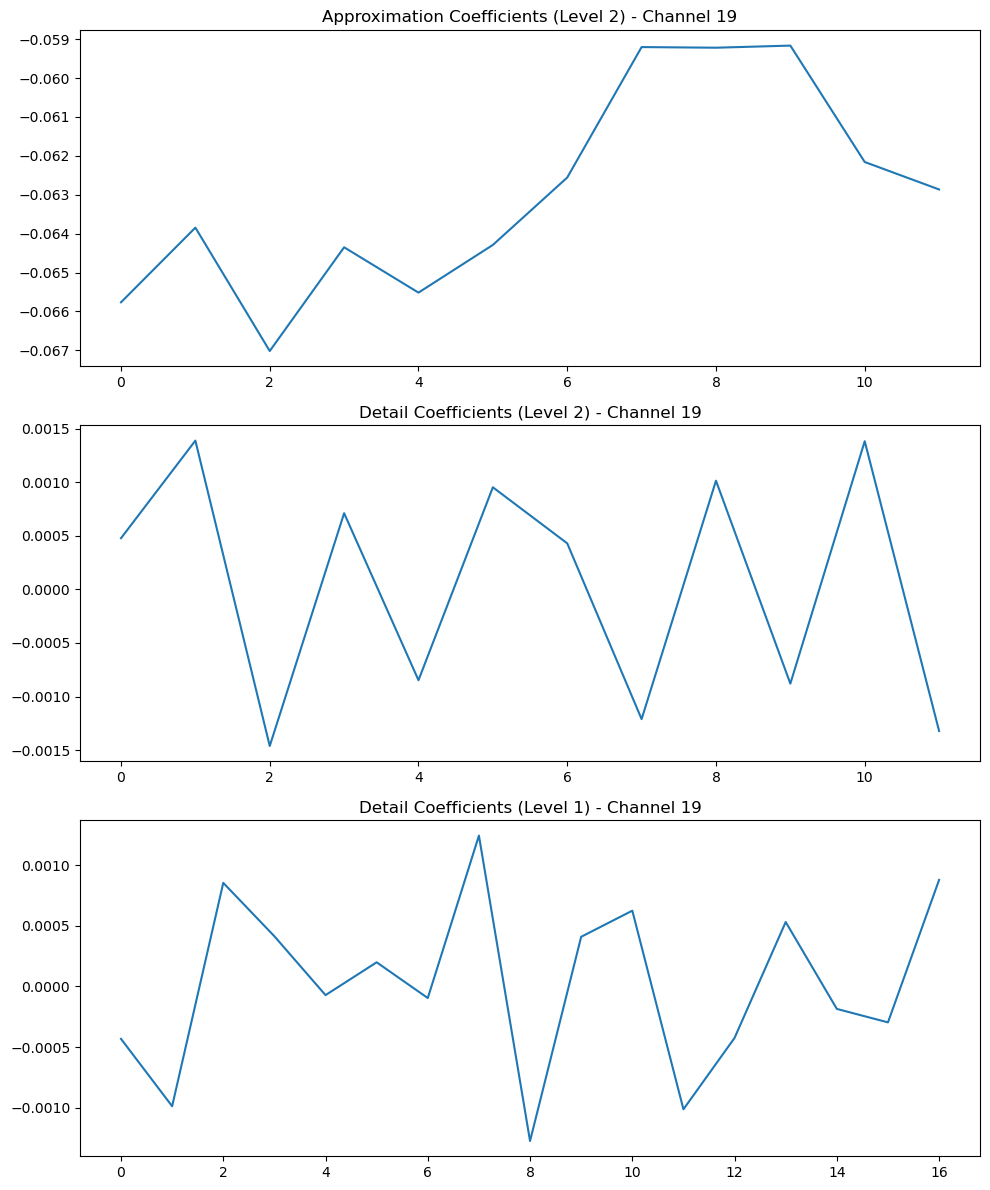

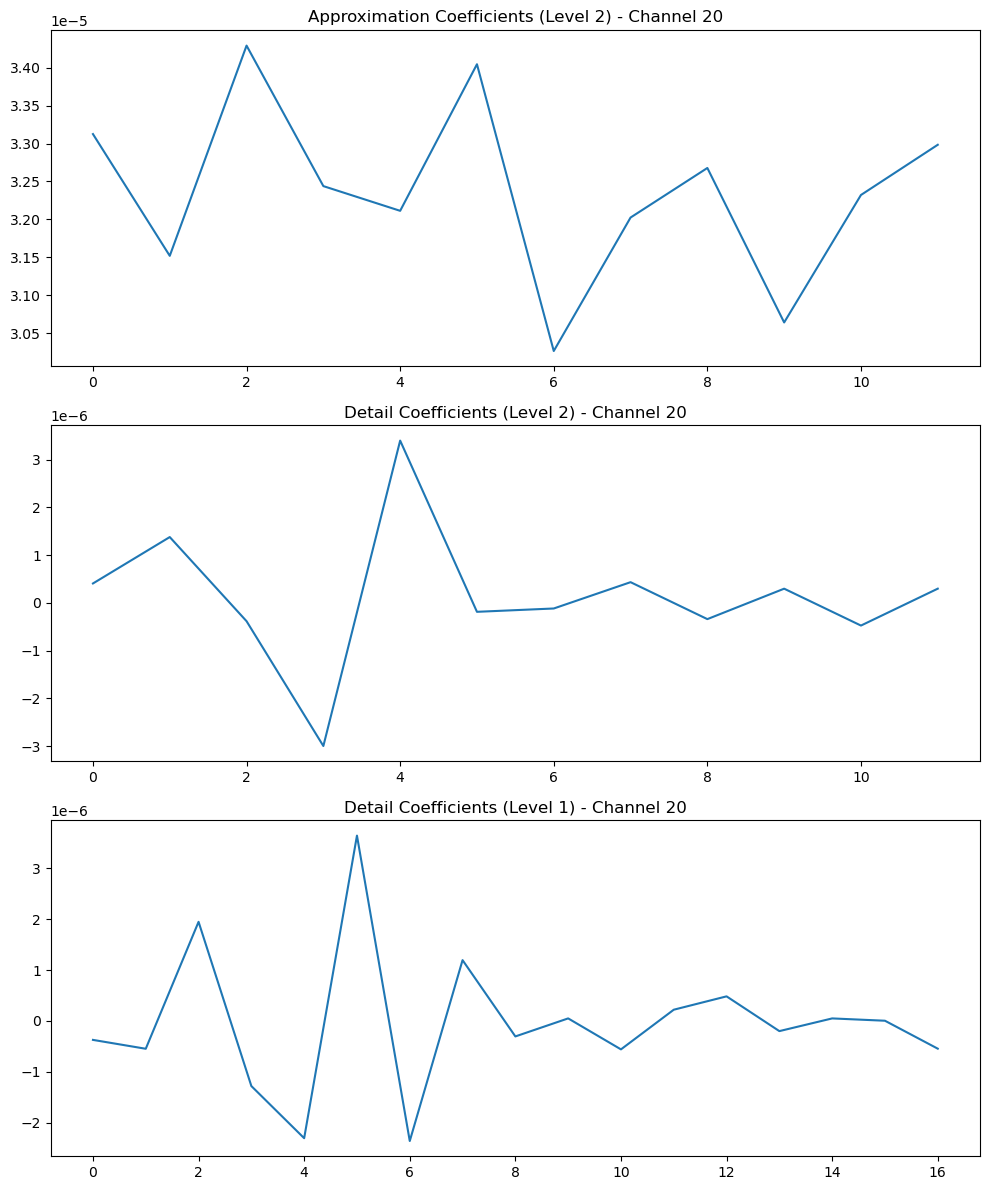

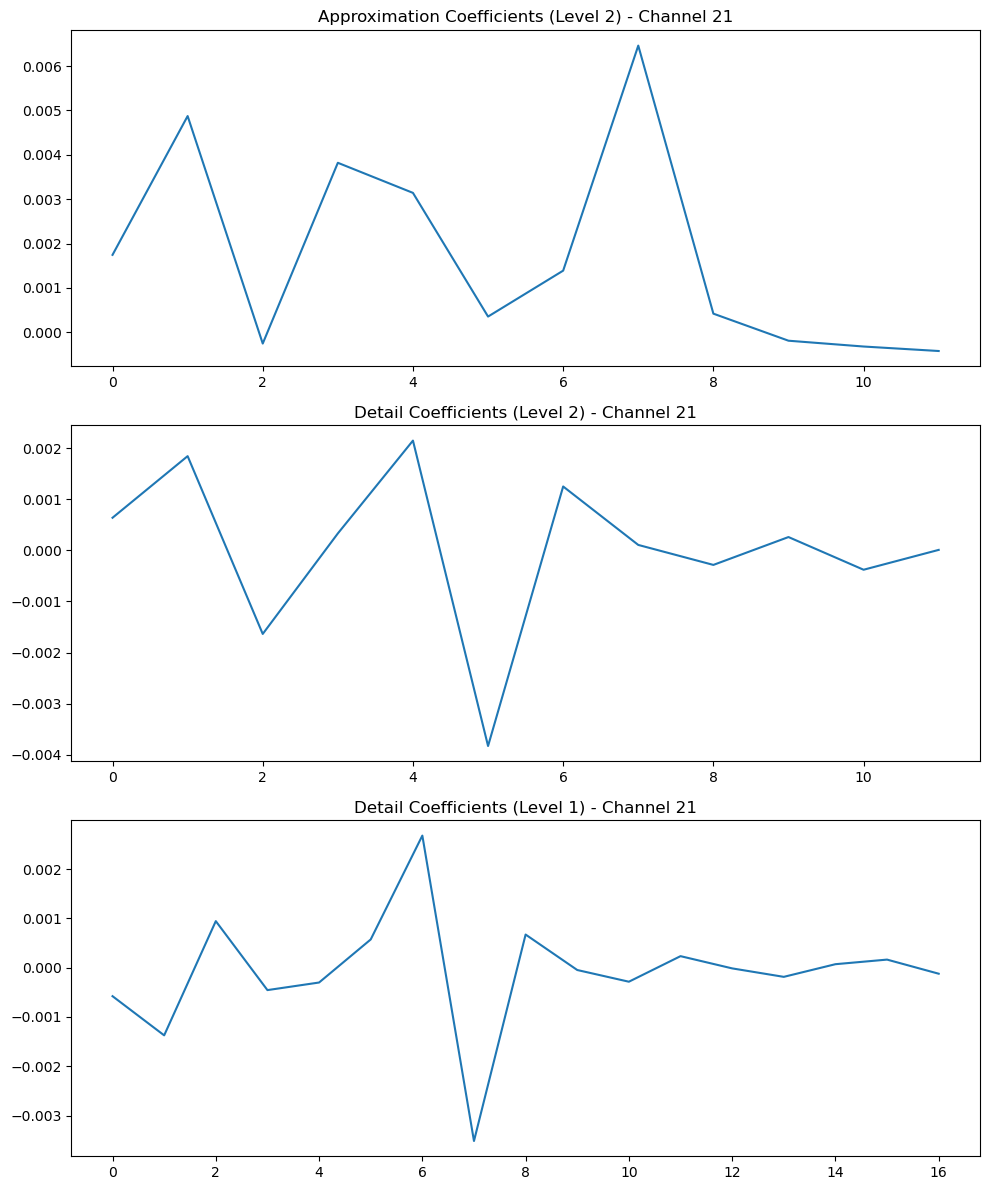

KeyboardInterrupt: 

In [18]:
# DWT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import os

file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir_mat = '../DATA/DWT_images/'
# output_dir_mat = 'D:/Codes/tactileGestureDetection/DATA/DWT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir_mat):
    for filename in os.listdir(output_dir_mat):
        file_path = os.path.join(output_dir_mat, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir_mat)

os.makedirs(output_dir_mat)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))


# Define DWT wavelet
wavelet = 'db4'  # Daubechies 4 wavelet


# 创建一个用于存储所有cwt matrix及相关信息的列表
dwt_records = []
label_records = []
id_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    window_touch_type = window_data['window_touch_type'].iloc[0]
    print(window_data.shape)

    # 创建一个数据存储空间
    data_matrix = []
    timestamps = np.arange(len(window_data))
    
    for col in columns_of_interest:
        signal = window_data[col].values

        # DWT parameter that depends on window size
        max_level = pywt.dwt_max_level(len(window_data), pywt.Wavelet(wavelet).dec_len)
        level = min(5, max_level)  # Choose the decomposition level
        
        coefficients = pywt.wavedec(signal, wavelet, level=level)
        
        data_matrix.append(coefficients)
        # data_matrix.append(np.abs(coefficients))
        # print(f"CWT performed on channel {col}, size is {coefficients.shape}")
    
    # dwt_matrix = np.stack(data_matrix, axis=-1)  # 沿新的轴（-1轴）堆叠
    # print("DWT 3D array shape:", dwt_matrix.shape)  # (channels, scales, time)
    
    # dwt_records.append(dwt_matrix) 
    # label_records.append(window_touch_type)
    # id_records.append(window_id)

    # Plot the scalogram for each channel
    for i in range(len(columns_of_interest)):
        coeffs = data_matrix[i]
        fig, axs = plt.subplots(len(coeffs), 1, figsize=(10, 12))
        for j, coeff in enumerate(coeffs):
            axs[j].plot(coeff)
            if j == 0:
                axs[j].set_title(f'Approximation Coefficients (Level {level}) - Channel {i}')
            else:
                axs[j].set_title(f'Detail Coefficients (Level {level - j + 1}) - Channel {i}')
        plt.tight_layout()
        plt.show()
# 保存matrix及相关信息为npz文件
# matrix_path = os.path.join(output_dir_mat, 'cwt_matrices.npz')
# np.savez(matrix_path, cwt_matrices=cwt_records, labels = label_records, window_ids = id_records)
# print("STFT Matrices已成功保存。")

In [1]:
# Old
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal as sg
import os
file_path = '../DATA/labeled_window_dataset.csv'
data = pd.read_csv(file_path)

output_dir = '../DATA/STFT_images/'

# 删除输出目录及其内容（如果存在），然后重新创建目录
if os.path.exists(output_dir):
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
    os.rmdir(output_dir)

os.makedirs(output_dir)

# data = pd.read_csv(file_path)

# 排除不感兴趣的列
# columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'window_id']]
joint0_colums = ['e0','de0','tau_J0','tau_ext0']
joint1_colums = ['e1','de1','tau_J1','tau_ext1']
joint2_colums = ['e2','de2','tau_J2','tau_ext2']
joint3_colums = ['e3','de3','tau_J3','tau_ext3']
joint4_colums = ['e4','de4','tau_J4','tau_ext4']
joint5_colums = ['e5','de5','tau_J5','tau_ext5']
joint6_colums = ['e6','de6','tau_J6','tau_ext6']

columns_of_interest = np.hstack((joint0_colums, joint1_colums, joint2_colums, joint3_colums, joint4_colums, joint5_colums, joint6_colums))

# 提取采样率
# time_data = data['time'].values
# fs = 1 / np.mean(np.diff(time_data))  # 计算采样率
fs = 100
## 应该设置成与采样时一致的100Hz

# 创建一个列表，用于记录图像文件名和对应的window_id和touch_type
image_records = []

# 分块绘制
window_ids = data['window_id'].unique()

for window_id in window_ids:
    window_data = data[data['window_id'] == window_id]
    touch_type = window_data['window_touch_type'].iloc[0]
    
    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f'Window ID: {window_id}, Touch_type: {touch_type}')
    
    for col in columns_of_interest:
        signal = window_data[col].values
        
        # 计算STFT
        # nperseg = min(256, len(signal))  # 确保窗口长度不超过信号长度
        nperseg = 16
        # print(len(signal))
        # noverlap = nperseg // 2 # normal setting
        noverlap = nperseg - 1 # for better time 
        # f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window=sg.windows.general_gaussian(14, p=1, sig=7))
        f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap, window='hamming')
        print(len(abs(Zxx)),"行",len(abs(Zxx)[0]),"列")
        
        # 绘制时频谱图
        cax = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1)
    
    # # 添加图例和标签
    # ax.set_ylabel('Frequency [Hz]')
    # ax.set_xlabel('Time [sec]')
    # fig.colorbar(cax, ax=ax, label='Magnitude')
    
    # # 保存图像
    # image_filename = f'window_{window_id}_touch_{touch_type}.png'
    # image_path = os.path.join(output_dir, image_filename)
    # plt.savefig(image_path)
    # plt.close(fig)
    
    # # 记录图像文件名和对应的window_id和touch_type
    # image_records.append({'image_filename': image_filename, 'window_id': window_id, 'touch_type': touch_type})

# 保存记录为CSV文件
records_df = pd.DataFrame(image_records)
records_df.to_csv(os.path.join(output_dir, 'image_records.csv'), index=False)

print("STFT图像和记录已成功保存。")

C:\Users\nanjo\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PermissionError: [WinError 5] 拒绝访问。: '../DATA/STFT_images/'

In [7]:

import os

base_dir = os.path.dirname(os.path.realpath('file'))

print(base_dir)

base_dir = os.getcwd()

print(base_dir)

D:\Codes\tactileGestureDetection\Process_Data
d:\Codes\tactileGestureDetection\Process_Data
